In [1]:
import numpy
import velocyto

# 1. Reading data

In [3]:
vlm = velocyto.VelocytoLoom("/Volumes/omics4tb2/alomana/projects/mscni/results/velocyto/20765_M397_control/velocyto/20765_M397_control.loom")

In [21]:
vlm = velocyto.VelocytoLoom("/Volumes/omics4tb2/alomana/projects/mscni/results/velocyto/21729_day3/velocyto/21729_day3.loom")







In [39]:
vlm = velocyto.VelocytoLoom("/Volumes/omics4tb2/alomana/projects/mscni/results/velocyto/21766_day6/velocyto/21766_day6.loom")







In [57]:
vlm = velocyto.VelocytoLoom("/Volumes/omics4tb2/alomana/projects/mscni/results/velocyto/22077_day13/velocyto/22077_day13.loom")







In [75]:
vlm = velocyto.VelocytoLoom("/Volumes/omics4tb2/alomana/projects/mscni/results/velocyto/18324_Yapeng_single_cell/velocyto/18324_Yapeng_single_cell.loom")







# 2. Normalization

In [76]:
vlm.normalize("S", size=True, log=True)
vlm.S_norm  # contains log normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# 3. Early check

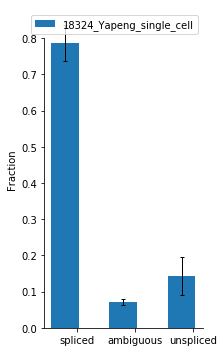

In [77]:
vlm.plot_fractions()

# 4. Preliminary filtering

In [78]:
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > numpy.percentile(vlm.initial_Ucell_size, 0.5))

In [79]:
# vlm.set_clusters(vlm.ca["ClusterName"])

In [80]:
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30)
vlm.filter_genes(by_detection_levels=True)

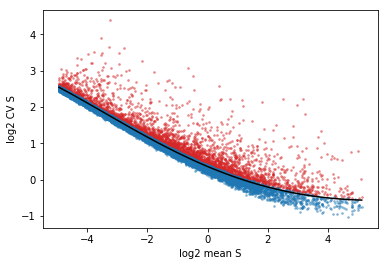

In [81]:
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)
vlm.filter_genes(by_cv_vs_mean=True)

In [82]:
vlm._normalize_S(relative_size=vlm.S.sum(0),
             target_size=vlm.S.sum(0).mean())
vlm._normalize_U(relative_size=vlm.U.sum(0),
             target_size=vlm.U.sum(0).mean())

# 5. Preparation for gamma fit

In [83]:
vlm.perform_PCA()
nei=int(0.025*969)
print(nei)
vlm.knn_imputation(k=nei,n_pca_dims=20,balanced=True,n_jobs=8)

24


In [84]:
# 6. Gamma fit and extrapolation

In [85]:
vlm.fit_gammas()


In [86]:
#vlm.plot_phase_portraits(['SOX3'])

In [87]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_velocity")
vlm.extrapolate_cell_at_t(delta_t=1.)

In [88]:
from sklearn.manifold import TSNE
bh_tsne = TSNE()
vlm.ts = bh_tsne.fit_transform(vlm.pcs[:, :25])

In [89]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,n_neighbors=nei, knn_random=True, sampled_fraction=0.5)
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=True)
vlm.calculate_grid_arrows(smooth=0.8, steps=(40, 40), n_neighbors=nei)

/Users/alomana/anaconda3/lib/python3.7/site-packages/velocyto/analysis.py:1569: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  p=p) for i in range(neigh_ixs.shape[0])), 0)


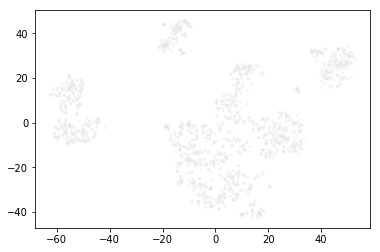

In [90]:
plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c="0.8", alpha=0.2, s=10, edgecolor="")

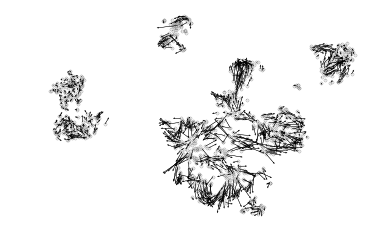

In [91]:
import matplotlib.pyplot as plt
ix_choice = numpy.random.choice(vlm.embedding.shape[0], size=int(vlm.embedding.shape[0]/1.), replace=False)
plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c="0.8", alpha=0.4, s=10, edgecolor=(0,0,0,1), lw=0.3, rasterized=True)

quiver_kwargs=dict(headaxislength=7, headlength=11, headwidth=8,linewidths=0.25, width=0.00045,edgecolors="k", color='black', alpha=1)
plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
            **quiver_kwargs)

plt.axis("off")
plt.savefig("day.24.full_arrows.pdf")
